In [28]:
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
np.random.seed(333)

In [30]:
random_1 = np.random.randn(2,100)

In [31]:
random_1.shape

(2, 100)

In [32]:
random_2 = np.random.randn(2,100) + 2

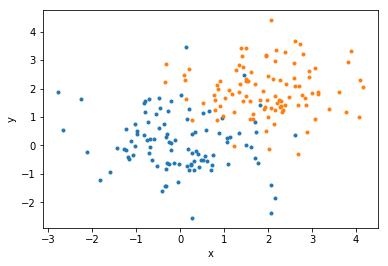

In [33]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.xlabel('x')
pl.ylabel('y');

# 1. chose the number of clusters 
nclusters = 2

In [34]:
random_stack = np.hstack([random_1, random_2])

# 2. set a guess for the initial centers

In [35]:
# fix the centers to a poor initial guess
centers = np.array([[0.,-1.], [0,-2]]) 

# a better initial guess would have been
#minval, maxval = min(random_stack[0]), max(random_stack[0])
#np.array((np.random.rand(4)   * (maxval - minval)) + minval).reshape(2,2)

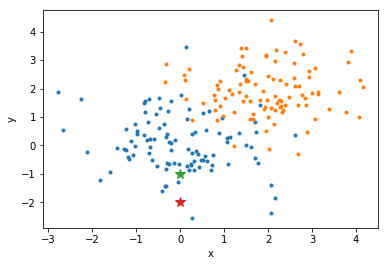

In [36]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.plot(centers[0,0], centers[0,1], '*', ms=10)
pl.plot(centers[1,0], centers[1,1], '*', ms=10)
pl.xlabel('x')
pl.ylabel('y');

In [37]:
#define the distance metric - just Eucledian distance
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

# 3. check for each point which center is closer

In [38]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

cl1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

# 4. calculate new centers

In [39]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", centers, "\nnew center\n", newc)

old center
 [[ 0. -1.]
 [ 0. -2.]] 
new center
 [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]]


# 5. iterate 3&4 till convergence

In [40]:
def distCenters(nc, oc):
    
    c1_n = nc[0] 
    c2_n = nc[1]
    
    c1_o = oc[0]
    c2_o = oc[0]
    
    return np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)
    

old center
 [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]] 
new center
 [[ 1.0864584   1.33128024]
 [ 0.26038932 -1.02156344]]
old center
 [[ 1.0864584   1.33128024]
 [ 0.26038932 -1.02156344]] 
new center
 [[ 1.51743939  1.69021039]
 [-0.19078144 -0.46081543]]
old center
 [[ 1.51743939  1.69021039]
 [-0.19078144 -0.46081543]] 
new center
 [[ 1.8303943   1.81924948]
 [-0.21623802 -0.12686326]]
old center
 [[ 1.8303943   1.81924948]
 [-0.21623802 -0.12686326]] 
new center
 [[ 1.90521904  1.88827286]
 [-0.14843    -0.05983864]]
old center
 [[ 1.90521904  1.88827286]
 [-0.14843    -0.05983864]] 
new center
 [[  1.96325332e+00   1.90823820e+00]
 [ -1.26103718e-01   1.20148998e-04]]
old center
 [[  1.96325332e+00   1.90823820e+00]
 [ -1.26103718e-01   1.20148998e-04]] 
new center
 [[ 2.00484901  1.92635603]
 [-0.10543728  0.03967459]]
old center
 [[ 2.00484901  1.92635603]
 [-0.10543728  0.03967459]] 
new center
 [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]
old center
 [[ 

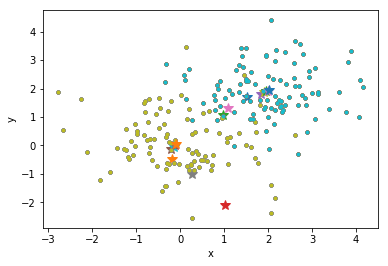

In [41]:
iter_count = 0

while(~((centers == newc).all()) and iter_count < 1000):
    
    # set the new centers 
    centers = newc
    
    #
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])
    
    # calculate the new center
    newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    print ("old center\n", centers, "\nnew center\n", newc)
    
    
    pl.plot(random_1[0], random_1[1], '.')
    pl.plot(random_2[0], random_2[1], '.')
    pl.plot(centers[0,0], centers[0,1], '*', ms=10)
    pl.plot(centers[1,0], centers[1,1], '*', ms=10)
    pl.xlabel('x')
    pl.ylabel('y');
    
    iter_count += 1
    

In [42]:
centers.all()

True

In [43]:
iter_count

8

In [44]:
[your code here... 
 and remember that this series of plots should render as an animation in your notebook.
 See how to here: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab11_fb55/animationExample.ipynb]

SyntaxError: invalid syntax (<ipython-input-44-9d9babf7706b>, line 1)

Points: 10

Total: 9